In [32]:
import anndata as ad
import csv
import numpy as np
import pandas as pd
import scanpy as sc
from scipy.sparse import csr_matrix

In [33]:
OLINK_total = pd.read_csv('../data/2-updated_OLINK_data_nanToZero.csv')
OLINK_total.shape

(41449, 2920)

In [34]:
OLINK_total.head()

,Id,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
0,1000221,0.757567,1.059738,0.815933,0.763303,0.911962,0.988546,0.661753,0.497269,1.032355,...,0.856418,0.818377,0.875872,0.808958,1.000000,0.829799,2.176731,1.150268,0.000000,0.000000
1,1000326,1.062782,2.293678,0.000000,0.000000,0.940864,0.816711,0.941631,1.968941,0.968208,...,1.015154,1.980759,0.743593,1.033172,2.281750,0.000000,2.056565,0.985895,0.734873,0.000000
2,1000662,1.042251,1.417310,0.940098,0.967622,1.076896,1.092434,1.242879,0.807585,1.054544,...,1.123415,1.348269,0.834863,1.147824,1.316108,1.107852,0.452451,0.964498,0.969676,1.186373
3,1000823,1.391736,1.279477,0.871398,1.103463,1.140979,1.412810,0.917597,1.007419,1.104586,...,0.987505,1.353375,0.934770,1.208649,1.212596,0.889118,1.657512,1.032764,0.871443,1.258823
4,1000945,0.910838,0.286904,0.736551,0.884847,0.933054,0.749714,0.000000,0.000000,0.890822,...,0.812096,0.526413,0.859511,0.316076,0.456966,0.722186,1.486522,0.849878,3.465817,1.057866


### Get the sub dataset

In [35]:
small_df = OLINK_total.sample(frac=0.2, random_state=66)
small_df.shape

(8290, 2920)

In [36]:
small_df

,Id,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
13855,2677744,1.000000,0.918538,0.838626,1.128345,1.023336,0.959534,1.140160,0.000000,0.959825,...,0.851392,0.773959,1.000075,0.982162,1.071514,0.853623,2.307786,0.630636,0.516765,0.956622
36655,5442589,0.892758,1.216096,0.806386,0.930984,0.815113,1.060883,1.005912,0.563765,1.122820,...,1.105924,1.107692,0.000000,0.950432,0.878537,0.990531,0.610571,1.385925,0.543388,0.764618
41208,5995054,1.359714,1.514193,1.131876,1.173802,0.929273,0.997802,1.007821,0.883290,0.945952,...,1.020440,0.931365,1.029011,1.335312,1.244005,1.447208,1.343598,1.104265,0.842998,1.815272
7917,1969066,0.843706,1.168799,0.904953,0.813905,1.011697,0.888383,0.781125,1.277478,0.830456,...,0.962914,0.859219,0.724947,0.923540,1.006012,0.840478,1.047611,0.999650,0.788088,0.901370
37474,5540794,1.041274,1.097060,0.976544,1.747628,1.004245,1.023405,1.343416,1.065035,0.851704,...,1.020440,0.000000,0.951421,0.994959,0.771263,1.470941,2.527919,0.000000,1.127315,1.052732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33969,5104835,0.679861,0.613059,0.831945,0.776827,0.879221,0.735512,0.868635,1.043795,0.708542,...,0.869925,0.903859,0.803670,0.876942,1.045702,0.718021,0.621868,0.999225,0.583298,0.923729
15195,2837591,1.068084,0.559332,0.954104,0.801643,1.149114,1.115266,1.281183,0.350604,0.996205,...,1.040246,0.991426,0.548508,0.746679,0.695022,0.652824,1.285484,0.937180,2.669968,0.998101
30095,4632932,1.104105,0.905885,1.047611,1.504980,0.964815,0.979399,0.599711,1.507896,1.099992,...,1.036039,1.117960,0.928490,1.232110,0.971046,0.999000,1.148154,1.040092,0.000000,0.000000
18823,3262497,1.430672,1.083854,0.920942,1.851963,1.135141,1.337546,1.001508,1.043383,1.099352,...,1.389818,0.672862,0.852083,0.988893,0.855925,0.899699,0.943262,0.872804,2.506543,0.000000


In [37]:
OLINK = small_df
OLINK.to_csv("../data/3-OLINK_data_sub.csv", index = False)

### Process the sub dataset

In [38]:
OLINK = pd.read_csv('../data/3-OLINK_data_sub.csv')

In [39]:
OLINK.head()

,Id,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
0,2677744,1.000000,0.918538,0.838626,1.128345,1.023336,0.959534,1.140160,0.000000,0.959825,...,0.851392,0.773959,1.000075,0.982162,1.071514,0.853623,2.307786,0.630636,0.516765,0.956622
1,5442589,0.892758,1.216096,0.806386,0.930984,0.815113,1.060883,1.005912,0.563765,1.122820,...,1.105924,1.107692,0.000000,0.950432,0.878537,0.990531,0.610571,1.385925,0.543388,0.764618
2,5995054,1.359714,1.514193,1.131876,1.173802,0.929273,0.997802,1.007821,0.883290,0.945952,...,1.020440,0.931365,1.029011,1.335312,1.244005,1.447208,1.343598,1.104265,0.842998,1.815272
3,1969066,0.843706,1.168799,0.904953,0.813905,1.011697,0.888383,0.781125,1.277478,0.830456,...,0.962914,0.859219,0.724947,0.923540,1.006012,0.840478,1.047611,0.999650,0.788088,0.901370
4,5540794,1.041274,1.097060,0.976544,1.747628,1.004245,1.023405,1.343416,1.065035,0.851704,...,1.020440,0.000000,0.951421,0.994959,0.771263,1.470941,2.527919,0.000000,1.127315,1.052732


In [40]:
OLINK=OLINK.set_index('Id')
# OLINK.columns=([a[2:] for a in OLINK.columns])
OLINK.index.names = ['Id']
OLINK.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
2677744,1.000000,0.918538,0.838626,1.128345,1.023336,0.959534,1.140160,0.000000,0.959825,1.143194,...,0.851392,0.773959,1.000075,0.982162,1.071514,0.853623,2.307786,0.630636,0.516765,0.956622
5442589,0.892758,1.216096,0.806386,0.930984,0.815113,1.060883,1.005912,0.563765,1.122820,0.812698,...,1.105924,1.107692,0.000000,0.950432,0.878537,0.990531,0.610571,1.385925,0.543388,0.764618
5995054,1.359714,1.514193,1.131876,1.173802,0.929273,0.997802,1.007821,0.883290,0.945952,1.465609,...,1.020440,0.931365,1.029011,1.335312,1.244005,1.447208,1.343598,1.104265,0.842998,1.815272
1969066,0.843706,1.168799,0.904953,0.813905,1.011697,0.888383,0.781125,1.277478,0.830456,0.784181,...,0.962914,0.859219,0.724947,0.923540,1.006012,0.840478,1.047611,0.999650,0.788088,0.901370
5540794,1.041274,1.097060,0.976544,1.747628,1.004245,1.023405,1.343416,1.065035,0.851704,1.465067,...,1.020440,0.000000,0.951421,0.994959,0.771263,1.470941,2.527919,0.000000,1.127315,1.052732


In [41]:
range_per_column = OLINK.max() - OLINK.min()
print(range_per_column)

# 获取数据范围的最小值和最大值
min_range = range_per_column.min()
max_range = range_per_column.max()

print(min_range, max_range)
print(range_per_column.idxmin(), range_per_column.idxmax())

EIF4EBP1    2.251173
EIF4G1      2.690604
EIF5A       1.543532
ENAH        1.885804
ENG         1.295652
              ...   
CHGB        1.724464
CHGA        2.904343
CHRM1       1.677554
KLK1        4.139285
WFDC2       1.854422
Length: 2919, dtype: float64
1.125255683732487 7.911753475246891
SERPINA1 SPINT3


<Axes: xlabel='None'>

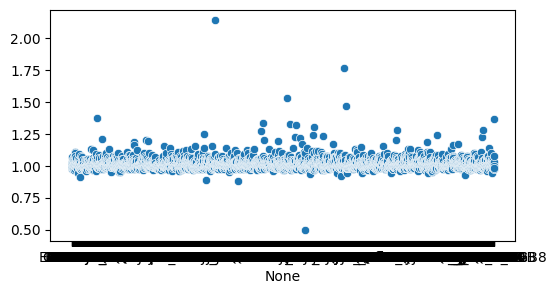

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

means = OLINK.mean()

plt.figure(figsize=(6, 3))
sns.scatterplot(x=means.index, y=means.values)

<Axes: xlabel='None'>

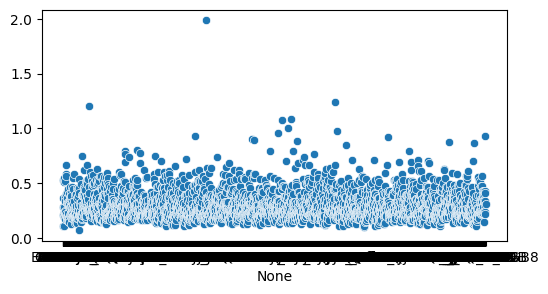

In [43]:
std_devs = OLINK.std()

plt.figure(figsize=(6, 3))
sns.scatterplot(x=std_devs.index, y=std_devs.values)

### Split to train and test dataset

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(OLINK, test_size=0.3, random_state=66)

In [45]:
X_train.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
4345870,1.631530,0.520358,1.095889,0.927565,0.999550,1.137158,1.040760,0.423133,1.166801,1.020088,...,0.957544,0.640255,0.544157,0.677085,0.880774,0.867098,0.855948,1.022777,0.418969,1.135631
4470636,0.456559,0.268151,1.248778,0.834885,1.045805,1.011495,1.042869,1.365458,1.112146,0.973400,...,0.995133,1.050401,1.205758,0.812354,0.440211,0.904860,1.066568,0.993913,0.707882,1.701807
3236504,0.978069,1.447968,1.010760,0.978759,0.787604,0.758057,0.000000,0.000000,0.968306,0.916515,...,0.827047,1.135740,1.063744,1.365887,1.722233,0.676785,0.703318,0.792771,0.567300,0.838581
3306041,0.973743,0.843175,1.025064,0.991127,0.992718,0.793109,0.959048,0.542761,0.868862,0.921225,...,0.984707,1.434071,0.881505,0.970459,1.085122,0.788762,0.843529,1.002753,0.847698,1.072799
3306375,1.062782,2.067973,0.958223,1.036051,0.892897,0.643955,0.760226,2.144436,1.104961,1.055246,...,1.020440,1.050247,1.637564,1.844956,2.108278,0.923304,1.737951,0.829318,2.316171,1.177258


In [17]:
# X_train.to_csv("../data/3-OLINK_data_sub_train.csv")
# X_test.to_csv("../data/3-OLINK_data_sub_test.csv")

### Normalization

对数据进行 Min-Max 标准化处理

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [47]:
X_train_norm

array([[0.72474686, 0.19339814, 0.70998769, ..., 0.60968355, 0.10173683,
        0.61239101],
       [0.20280922, 0.09966185, 0.80903893, ..., 0.59247747, 0.17189268,
        0.9177024 ],
       [0.43447099, 0.5381574 , 0.6548359 , ..., 0.47257529, 0.1377555 ,
        0.45220642],
       ...,
       [0.4674521 , 0.43155856, 0.72337876, ..., 0.57832122, 0.14915311,
        0.53374395],
       [0.51413099, 0.60542469, 0.5543353 , ..., 0.56629937, 0.21045582,
        0.52329509],
       [0.36208368, 0.16308357, 0.64786459, ..., 0.        , 0.30146758,
        0.4141438 ]])

In [48]:
X_train_norm_df = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index)
X_test_norm_df = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)

In [23]:
# X_train_norm_df.to_csv("../data/3-OLINK_data_sub_train_norm.csv")
# X_test_norm_df.to_csv("../data/3-OLINK_data_sub_test_norm.csv")

In [49]:
X_train_norm_df.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
4345870,0.724747,0.193398,0.709988,0.491867,0.771465,0.712243,0.620365,0.165960,0.870023,0.481566,...,0.629430,0.311242,0.219170,0.350386,0.379996,0.502822,0.294713,0.609684,0.101737,0.612391
4470636,0.202809,0.099662,0.809039,0.442721,0.807165,0.633537,0.621622,0.535556,0.829270,0.459525,...,0.654139,0.510623,0.485642,0.420387,0.189922,0.524719,0.367232,0.592477,0.171893,0.917702
3236504,0.434471,0.538157,0.654836,0.519014,0.607882,0.474799,0.000000,0.000000,0.722016,0.432671,...,0.543650,0.552108,0.428443,0.706836,0.743031,0.392461,0.242161,0.472575,0.137755,0.452206
3306041,0.432549,0.313378,0.664103,0.525573,0.766192,0.496753,0.571659,0.212880,0.647865,0.434894,...,0.647286,0.697134,0.355043,0.502205,0.468159,0.457395,0.290437,0.597747,0.205844,0.578509
3306375,0.472101,0.768591,0.620799,0.549395,0.689148,0.403333,0.453147,0.841084,0.823912,0.498163,...,0.670775,0.510548,0.659560,0.954751,0.909584,0.535415,0.598397,0.494362,0.562428,0.634838


### Construct the adata

In [50]:
def constructAdata(df):
    
    df.columns = df.columns.astype(str)
    df.index = df.index.astype(str)
    print(df.head())

    Odata = ad.AnnData(df)
    print(Odata)

    return Odata
    

In [51]:
Odata_train = constructAdata(X_train_norm_df)
Odata_test = constructAdata(X_test_norm_df)

         EIF4EBP1    EIF4G1     EIF5A      ENAH       ENG     ENPP2     ENPP5  \
Id                                                                              
4345870  0.724747  0.193398  0.709988  0.491867  0.771465  0.712243  0.620365   
4470636  0.202809  0.099662  0.809039  0.442721  0.807165  0.633537  0.621622   
3236504  0.434471  0.538157  0.654836  0.519014  0.607882  0.474799  0.000000   
3306041  0.432549  0.313378  0.664103  0.525573  0.766192  0.496753  0.571659   
3306375  0.472101  0.768591  0.620799  0.549395  0.689148  0.403333  0.453147   

            ENPP7    ENTPD5     EGLN1  ...    CHCHD6       CHM      CHP1  \
Id                                     ...                                 
4345870  0.165960  0.870023  0.481566  ...  0.629430  0.311242  0.219170   
4470636  0.535556  0.829270  0.459525  ...  0.654139  0.510623  0.485642   
3236504  0.000000  0.722016  0.432671  ...  0.543650  0.552108  0.428443   
3306041  0.212880  0.647865  0.434894  ...  0.647286

In [52]:
# OLINK_b = X_train_norm_df

In [53]:
# OLINK_b.columns = OLINK_b.columns.astype(str)
# OLINK_b.index = OLINK_b.index.astype(str)
# OLINK_b.head()

In [54]:
# Odata = ad.AnnData(OLINK_b)
# Odata

In [55]:
# print(Odata.var_names)

### 基因匹配

In [56]:
def matchGenes(a):
    Odata = a.copy()
    with open('/data/mr423/project/keys_blood.txt', 'r') as file:
        genes_from_file = [line.strip() for line in file]
        
        not_in_genes=([ i for i in Odata.var_names if i not in genes_from_file ]) # 找出不在基因列表中的基因
        print("not on the genes lsts: \n")
        print(not_in_genes)
        print("\n")

        in_substr=[ i for i in not_in_genes if any([ i in j for j in genes_from_file])]
        print("match sub of the genes list: \n")
        print(in_substr)
        print("\n")

        for i in in_substr:
            print(f"process: {i}")
            out = list(np.array(genes_from_file)[[i in j for j in genes_from_file]])
            print(f"match to: {out}")
            if out:
                Odata.var.rename(index={i: out[0]}, inplace=True)

        # drop the genes no in the pre-trained model
        complement = list(set(not_in_genes) - set(in_substr))
        print("\n complement: \n", complement)

        return Odata


In [57]:
Odata_train_matched = matchGenes(Odata_train)

not on the genes lsts: 

['CKMT1A_CKMT1B', 'DEFA1_DEFA1B', 'PNLIPRP2', 'IL3RA', 'NTproBNP', 'MICB_MICA', 'SIGLEC5', 'SARG', 'SPACA5_SPACA5B', 'PALM2', 'HCG22', 'IL12A_IL12B', 'GPR15L', 'FHIP2A', 'GATD3', 'FUT3_FUT5', 'MENT', 'KIR2DL2', 'KIR2DS4', 'LEG1', 'LILRA3', 'LGALS7_LGALS7B', 'BTNL10', 'BOLA2_BOLA2B', 'BAP18', 'CD99', 'CERT', 'WARS', 'AMY1A_AMY1B_AMY1C', 'AKR7L', 'ANP32C', 'DEFB103A_DEFB103B', 'DEFB4A_DEFB4B', 'DEFB104A_DEFB104B', 'CTAG1A_CTAG1B', 'CSF2RA', 'CGB3_CGB5_CGB8', 'EBI3_IL27']


match sub of the genes list: 

['IL3RA', 'SIGLEC5', 'PALM2', 'GATD3', 'CD99', 'CERT', 'WARS', 'CSF2RA']


process: IL3RA
match to: ['IL3RA_ENSG00000185291']
process: SIGLEC5
match to: ['SIGLEC5_ENSG00000268500', 'SIGLEC5_ENSG00000105501']
process: PALM2
match to: ['PALM2AKAP2']
process: GATD3
match to: ['GATD3A', 'GATD3B']
process: CD99
match to: ['CD99_ENSG00000002586', 'CD99L2']
process: CERT
match to: ['CERT1']
process: WARS
match to: ['WARS2-IT1', 'WARS2', 'WARS1', 'WARS2-AS1']
process: CSF

In [58]:
Odata_test_matched = matchGenes(Odata_test)

not on the genes lsts: 

['CKMT1A_CKMT1B', 'DEFA1_DEFA1B', 'PNLIPRP2', 'IL3RA', 'NTproBNP', 'MICB_MICA', 'SIGLEC5', 'SARG', 'SPACA5_SPACA5B', 'PALM2', 'HCG22', 'IL12A_IL12B', 'GPR15L', 'FHIP2A', 'GATD3', 'FUT3_FUT5', 'MENT', 'KIR2DL2', 'KIR2DS4', 'LEG1', 'LILRA3', 'LGALS7_LGALS7B', 'BTNL10', 'BOLA2_BOLA2B', 'BAP18', 'CD99', 'CERT', 'WARS', 'AMY1A_AMY1B_AMY1C', 'AKR7L', 'ANP32C', 'DEFB103A_DEFB103B', 'DEFB4A_DEFB4B', 'DEFB104A_DEFB104B', 'CTAG1A_CTAG1B', 'CSF2RA', 'CGB3_CGB5_CGB8', 'EBI3_IL27']


match sub of the genes list: 

['IL3RA', 'SIGLEC5', 'PALM2', 'GATD3', 'CD99', 'CERT', 'WARS', 'CSF2RA']


process: IL3RA
match to: ['IL3RA_ENSG00000185291']
process: SIGLEC5
match to: ['SIGLEC5_ENSG00000268500', 'SIGLEC5_ENSG00000105501']
process: PALM2
match to: ['PALM2AKAP2']
process: GATD3
match to: ['GATD3A', 'GATD3B']
process: CD99
match to: ['CD99_ENSG00000002586', 'CD99L2']
process: CERT
match to: ['CERT1']
process: WARS
match to: ['WARS2-IT1', 'WARS2', 'WARS1', 'WARS2-AS1']
process: CSF

In [59]:
# with open('/data/mr423/project/gene2idx.txt', newline='') as f:
# # with open('/data/mr423/project/keys.txt', newline='') as f:
#     reader = csv.reader(f)
#     genes = list(reader)

# # print(type(genes))
    
# genes =  [ a.replace("'", "").replace(" ", "") for a in genes[0] ]
# # print(type(genes))
# # print(genes)

# not_in_genes=([ a for a in Odata.var_names if a not in genes ]) # 找出不在基因列表中的基因
# print("not_in_genes \n :",not_in_genes)
# '''
# 从 not_in_genes 列表中找出那些作为子字符串存在于 genes 列表中的基因名称，并将它们存储在 notin_substr 列表中。
# 样可以帮助我们识别那些虽然不完全匹配但在某种程度上与已有基因相关的基因名称
# '''
# notin_substr=[ a for a in not_in_genes if any([ a in b for b in genes])]
# notin_substr

In [60]:
# '''
# 将 notin_substr 列表中的基因子串替换为它们在 genes 列表中匹配的完整基因名称，并在 Odata.var 数据框中重命名这些基因
# '''
# for a in notin_substr:
#     print(a)
#     out=(list(np.array(genes)[[ a in b for b in genes]]))
#     Odata.var.rename(index={a: out[0]}, inplace=True)

In [61]:
gene_name = Odata_train_matched.var_names.astype("category")

Odata_train_matched.var["gene_name"] = gene_name
Odata_test_matched.var["gene_name"] = gene_name

## Sample data format

In [141]:
data_dir = "../tutorials/data/Multiple_Sclerosis_dataset/ms/c_data.h5ad"
adata = sc.read(data_dir)

In [16]:
Odata.obs = pd.DataFrame(index=Odata.obs.index, columns=adata.obs.columns)
Odata.obs[adata.obs.columns]=np.nan
Odata.shape

(2000, 2917)

### initial data

In [17]:
Odata.obs

,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[developmental stage],Sample Characteristic Ontology Term[developmental stage],...,Factor Value[disease],Factor Value Ontology Term[disease],Factor Value[sampling site],Factor Value Ontology Term[sampling site],Factor Value[inferred cell type - ontology labels],Factor Value Ontology Term[inferred cell type - ontology labels],Factor Value[inferred cell type - authors labels],Factor Value Ontology Term[inferred cell type - authors labels],str_batch,celltype
Id,,,,,,,,,,,,,,,,,,,,,
1000221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1237469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1237481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
i = 0
for col in Odata.obs.columns:
    vvs = np.unique(Odata.obs[col].dropna())
    if len(vvs) == 0:
        i+=1
        print(f"列 {col} 全部都是 NA")
print(i)

列 Sample Characteristic[organism] 全部都是 NA
列 Sample Characteristic Ontology Term[organism] 全部都是 NA
列 Sample Characteristic[individual] 全部都是 NA
列 Sample Characteristic Ontology Term[individual] 全部都是 NA
列 Sample Characteristic[sex] 全部都是 NA
列 Sample Characteristic Ontology Term[sex] 全部都是 NA
列 Sample Characteristic[age] 全部都是 NA
列 Sample Characteristic Ontology Term[age] 全部都是 NA
列 Sample Characteristic[developmental stage] 全部都是 NA
列 Sample Characteristic Ontology Term[developmental stage] 全部都是 NA
列 Sample Characteristic[organism part] 全部都是 NA
列 Sample Characteristic Ontology Term[organism part] 全部都是 NA
列 Sample Characteristic[sampling site] 全部都是 NA
列 Sample Characteristic Ontology Term[sampling site] 全部都是 NA
列 Sample Characteristic[disease] 全部都是 NA
列 Sample Characteristic Ontology Term[disease] 全部都是 NA
列 Sample Characteristic[organism status] 全部都是 NA
列 Sample Characteristic Ontology Term[organism status] 全部都是 NA
列 Sample Characteristic[cause of death] 全部都是 NA
列 Sample Characteristic Ontology

In [19]:
Odata.obs.dtypes

Sample Characteristic[organism]                                     float64
Sample Characteristic Ontology Term[organism]                       float64
Sample Characteristic[individual]                                   float64
Sample Characteristic Ontology Term[individual]                     float64
Sample Characteristic[sex]                                          float64
Sample Characteristic Ontology Term[sex]                            float64
Sample Characteristic[age]                                          float64
Sample Characteristic Ontology Term[age]                            float64
Sample Characteristic[developmental stage]                          float64
Sample Characteristic Ontology Term[developmental stage]            float64
Sample Characteristic[organism part]                                float64
Sample Characteristic Ontology Term[organism part]                  float64
Sample Characteristic[sampling site]                                float64
Sample Chara

### set some data

In [20]:
# # 遍历 adata.obs 的每一列并处理
# for a in range(len(adata.obs.columns)):
#     vvs = np.unique(adata.obs.iloc[:, a].dropna())
#     if len(vvs) == 1:
#         # 将 Odata.obs 对应列显式转换为 adata.obs 对应列的类型
#         if adata.obs.iloc[:, a].dtype == object or isinstance(adata.obs.iloc[0, a], str):
            
#             Odata.obs.iloc[:, a] = Odata.obs.iloc[:, a].astype(object)
#         else:
#             Odata.obs.iloc[:, a] = Odata.obs.iloc[:, a].astype(adata.obs.iloc[:, a].dtype)
        
#         # 赋值为 adata.obs 中该列的第一个值
#         Odata.obs.iloc[:, a] = adata.obs.iloc[0, a]

In [21]:
i = 0
for col in Odata.obs.columns:
    vvs = np.unique(Odata.obs[col].dropna())
    if len(vvs) == 0:
        i+=1
        # print(f"列 {col} 全部都是 NA")
        print(f"Odata.obs.loc[:,'{col}']")
        # print(f"'{col}',")
print(i)

Odata.obs.loc[:,'Sample Characteristic[organism]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism]']
Odata.obs.loc[:,'Sample Characteristic[individual]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[individual]']
Odata.obs.loc[:,'Sample Characteristic[sex]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[sex]']
Odata.obs.loc[:,'Sample Characteristic[age]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[age]']
Odata.obs.loc[:,'Sample Characteristic[developmental stage]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[developmental stage]']
Odata.obs.loc[:,'Sample Characteristic[organism part]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism part]']
Odata.obs.loc[:,'Sample Characteristic[sampling site]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[sampling site]']
Odata.obs.loc[:,'Sample Characteristic[disease]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[disease]']
Odata.obs.loc[:,'Sample Characteristic[organism 

### set fake data

In [29]:
columns_to_convert = [
    'Sample Characteristic[organism]',
    'Sample Characteristic Ontology Term[organism]',
    'Sample Characteristic[individual]',
    'Sample Characteristic[sex]',
    'Sample Characteristic Ontology Term[sex]',
    'Sample Characteristic[age]',
    'Sample Characteristic[developmental stage]',
    'Sample Characteristic Ontology Term[developmental stage]',
    'Sample Characteristic[organism part]',
    'Sample Characteristic Ontology Term[organism part]',
    'Sample Characteristic[sampling site]',
    'Sample Characteristic Ontology Term[sampling site]',
    'Sample Characteristic[disease]',
    'Sample Characteristic Ontology Term[disease]',
    'Sample Characteristic[organism status]',
    'Sample Characteristic Ontology Term[organism status]',
    'Factor Value[disease]',
    'Factor Value Ontology Term[disease]',
    'Factor Value[sampling site]',
    'Factor Value Ontology Term[sampling site]',
    'Factor Value[inferred cell type - ontology labels]',
    'Factor Value Ontology Term[inferred cell type - ontology labels]',
    'Factor Value[inferred cell type - authors labels]',
    'Factor Value Ontology Term[inferred cell type - authors labels]',
    'str_batch',
    'celltype',
]

for column in columns_to_convert:
    Odata.obs[column] = Odata.obs[column].astype(str)

# Odata.obs.loc[:,'Sample Characteristic[organism]'] = 'Homo sapiens'
# Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism]'] = 'http://purl.obolibrary.org/obo/NCBITaxon_9606'
# Odata.obs.loc[:,'Sample Characteristic[individual]'] = Odata.obs.index
# Odata.obs.loc[:,'Sample Characteristic[sex]']='female'
# Odata.obs.loc[:,'Sample Characteristic Ontology Term[sex]']='http://purl.obolibrary.org/obo/PATO_0000383'
# Odata.obs.loc[:,'Sample Characteristic[age]']='60 year'
# Odata.obs.loc[:,'Sample Characteristic[developmental stage]'] = 'human adult stage'
# Odata.obs.loc[:,'Sample Characteristic[sampling site]']='blood plasma'
# Odata.obs.loc[:,'Sample Characteristic Ontology Term[sampling site]']='http://purl.obolibrary.org/obo/UBERON:0001969'
# Odata.obs.loc[:,'Factor Value[sampling site]']='http://purl.obolibrary.org/obo/UBERON:0001969'
# Odata.obs.loc[:,'Factor Value[inferred cell type - authors labels]'] = 'fake cell'
# Odata.obs.loc[:,'str_batch'] = '3'



Odata.obs.loc[:,'Sample Characteristic[organism]'] = 'Homo sapiens'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism]'] = 'http://purl.obolibrary.org/obo/NCBITaxon_9606'
Odata.obs.loc[:,'Sample Characteristic[individual]']= Odata.obs.index
Odata.obs.loc[:,'Sample Characteristic[sex]']= 'female'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[sex]'] ='http://purl.obolibrary.org/obo/PATO_0000383'
Odata.obs.loc[:,'Sample Characteristic[age]'] = '60 year'
Odata.obs.loc[:,'Sample Characteristic[developmental stage]'] ='human adult stage'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[developmental stage]'] ='http://purl.obolibrary.org/obo/HsapDv_0000087'
Odata.obs.loc[:,'Sample Characteristic[organism part]'] = 'blood'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism part]'] ='http://purl.obolibrary.org/obo/UBERON_0000955'
Odata.obs.loc[:,'Sample Characteristic[sampling site]'] ='blood plasma'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[sampling site]'] = 'http://purl.obolibrary.org/obo/UBERON:0001969'
Odata.obs.loc[:,'Sample Characteristic[disease]'] = 'normal'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[disease]'] ='http://purl.obolibrary.org/obo/PATO_0000461'
Odata.obs.loc[:,'Sample Characteristic[organism status]'] = 'dead'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism status]'] ='http://purl.obolibrary.org/obo/PATO_0001422'
Odata.obs.loc[:,'Factor Value[disease]'] ='normal'
Odata.obs.loc[:,'Factor Value Ontology Term[disease]'] = 'http://purl.obolibrary.org/obo/PATO_0000461'
Odata.obs.loc[:,'Factor Value[sampling site]'] = 'blood plasma'
Odata.obs.loc[:,'Factor Value Ontology Term[sampling site]']
Odata.obs.loc[:,'Factor Value[inferred cell type - ontology labels]']
Odata.obs.loc[:,'Factor Value Ontology Term[inferred cell type - ontology labels]']
Odata.obs.loc[:,'Factor Value[inferred cell type - authors labels]']
Odata.obs.loc[:,'Factor Value Ontology Term[inferred cell type - authors labels]']
Odata.obs.loc[:,'str_batch'] ='3'
# Odata.obs.loc[:,'celltype'] = '

In [30]:
Odata.obs

,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[developmental stage],Sample Characteristic Ontology Term[developmental stage],...,Factor Value[disease],Factor Value Ontology Term[disease],Factor Value[sampling site],Factor Value Ontology Term[sampling site],Factor Value[inferred cell type - ontology labels],Factor Value Ontology Term[inferred cell type - ontology labels],Factor Value[inferred cell type - authors labels],Factor Value Ontology Term[inferred cell type - authors labels],str_batch,celltype
Id,,,,,,,,,,,,,,,,,,,,,
1000221,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000221,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000326,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000326,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000662,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000662,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000823,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000823,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000945,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000945,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237356,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237356,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1237469,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237469,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1237481,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237481,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan


In [31]:
Odata.obs.dtypes

Sample Characteristic[organism]                                      object
Sample Characteristic Ontology Term[organism]                        object
Sample Characteristic[individual]                                    object
Sample Characteristic Ontology Term[individual]                     float64
Sample Characteristic[sex]                                           object
Sample Characteristic Ontology Term[sex]                             object
Sample Characteristic[age]                                           object
Sample Characteristic Ontology Term[age]                            float64
Sample Characteristic[developmental stage]                           object
Sample Characteristic Ontology Term[developmental stage]             object
Sample Characteristic[organism part]                                 object
Sample Characteristic Ontology Term[organism part]                   object
Sample Characteristic[sampling site]                                 object
Sample Chara

In [32]:
columns_to_convert = [
    'Sample Characteristic[organism]',
    'Sample Characteristic Ontology Term[organism]',
    'Sample Characteristic[individual]',
    'Sample Characteristic[sex]',
    'Sample Characteristic Ontology Term[sex]',
    'Sample Characteristic[age]',
    'Sample Characteristic[developmental stage]',
    'Sample Characteristic Ontology Term[developmental stage]',
    'Sample Characteristic[organism part]',
    'Sample Characteristic Ontology Term[organism part]',
    'Sample Characteristic[sampling site]',
    'Sample Characteristic Ontology Term[sampling site]',
    'Sample Characteristic[disease]',
    'Sample Characteristic Ontology Term[disease]',
    'Sample Characteristic[organism status]',
    'Sample Characteristic Ontology Term[organism status]',
    'Factor Value[disease]',
    'Factor Value Ontology Term[disease]',
    'Factor Value[sampling site]',
    'Factor Value Ontology Term[sampling site]',
    'Factor Value[inferred cell type - ontology labels]',
    'Factor Value Ontology Term[inferred cell type - ontology labels]',
    'Factor Value[inferred cell type - authors labels]',
    'Factor Value Ontology Term[inferred cell type - authors labels]',
    'str_batch',
    'celltype',
]

for column in columns_to_convert:
    Odata.obs[column] = Odata.obs[column].astype('category')

In [33]:
Odata.obs.dtypes

Sample Characteristic[organism]                                     category
Sample Characteristic Ontology Term[organism]                       category
Sample Characteristic[individual]                                   category
Sample Characteristic Ontology Term[individual]                      float64
Sample Characteristic[sex]                                          category
Sample Characteristic Ontology Term[sex]                            category
Sample Characteristic[age]                                          category
Sample Characteristic Ontology Term[age]                             float64
Sample Characteristic[developmental stage]                          category
Sample Characteristic Ontology Term[developmental stage]            category
Sample Characteristic[organism part]                                category
Sample Characteristic Ontology Term[organism part]                  category
Sample Characteristic[sampling site]                                category

In [34]:
Odata.obs

,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[developmental stage],Sample Characteristic Ontology Term[developmental stage],...,Factor Value[disease],Factor Value Ontology Term[disease],Factor Value[sampling site],Factor Value Ontology Term[sampling site],Factor Value[inferred cell type - ontology labels],Factor Value Ontology Term[inferred cell type - ontology labels],Factor Value[inferred cell type - authors labels],Factor Value Ontology Term[inferred cell type - authors labels],str_batch,celltype
Id,,,,,,,,,,,,,,,,,,,,,
1000221,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000221,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000326,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000326,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000662,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000662,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000823,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000823,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000945,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000945,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237356,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237356,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1237469,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237469,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1237481,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237481,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan


In [35]:
Odata.var

,gene_name
EIF4EBP1,EIF4EBP1
EIF4G1,EIF4G1
EIF5A,EIF5A
ENAH,ENAH
ENG,ENG
...,...
CHGB,CHGB
CHGA,CHGA
CHRM1,CHRM1
KLK1,KLK1


## Get sex data

In [62]:
OLINK_pheno=pd.read_csv('/shared/eduff/meg_ukb671140.csv')
OLINK_pheno=OLINK_pheno.set_index('eid')
OLINK_pheno.head()

,1558-0.0,1558-1.0,1558-2.0,1558-3.0,20116-0.0,20116-1.0,20116-2.0,20116-3.0,21000-0.0,21000-1.0,...,20003-3.38,20003-3.39,20003-3.40,20003-3.41,20003-3.42,20003-3.43,20003-3.44,20003-3.45,20003-3.46,20003-3.47
eid,,,,,,,,,,,,,,,,,,,,,
1000037,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000221,2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000326,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000662,5.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000823,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
def getSexFromBioBankData(adata):
    Odata = adata.copy()
    els=[int(i) for i in Odata.obs.index]
    gender_info = OLINK_pheno.loc[els, '31-0.0']
    gender_info = gender_info.map({1: 1, 0: 0})
    # print(gender_info)

    Odata.obs['sex'] = gender_info.values

    return Odata
    

In [64]:
Odata_train_with_sex = getSexFromBioBankData(Odata_train_matched)
Odata_test_with_sex = getSexFromBioBankData(Odata_test_matched)

In [66]:
Odata_train_with_sex.obs

,sex
Id,
4345870,0
4470636,1
3236504,0
3306041,1
3306375,0
...,...
5224082,0
1887434,0
3205452,1


## Get age data

In [67]:
OLINK_pheno=pd.read_csv('/shared/eduff/meg_ukb671140.csv')
OLINK_pheno=OLINK_pheno.set_index('eid')
OLINK_pheno

,1558-0.0,1558-1.0,1558-2.0,1558-3.0,20116-0.0,20116-1.0,20116-2.0,20116-3.0,21000-0.0,21000-1.0,...,20003-3.38,20003-3.39,20003-3.40,20003-3.41,20003-3.42,20003-3.43,20003-3.44,20003-3.45,20003-3.46,20003-3.47
eid,,,,,,,,,,,,,,,,,,,,,
1000037,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000221,2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000326,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000662,5.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000823,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023823,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6023922,6.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6024013,2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
def getDoBYearFromBioBankData(adata):
    Odata = adata.copy()
    
    els=[int(a) for a in Odata.obs.index]
    DoB_Year = OLINK_pheno.loc[els, '34-0.0']
    Odata.obs['DoB_Year'] = DoB_Year.values

    # current_year = 2024
    # Odata.obs['Age'] = (current_year - Odata.obs['DoB_Year']).astype(np.int8)   

    return Odata  

In [70]:
Odata_train_with_DoBYear = getDoBYearFromBioBankData(Odata_train_with_sex)
Odata_test_with_DoBYear = getDoBYearFromBioBankData(Odata_test_with_sex)

In [71]:
Odata_test_with_DoBYear.obs

,sex,DoB_Year
Id,,
4228635,0,1951.0
1763478,1,1949.0
1611073,0,1953.0
1057039,0,1957.0
2018635,1,1967.0
...,...,...
1275089,1,1940.0
1436569,0,1948.0
4986938,0,1942.0


In [72]:
def getDoBMonthFromBioBankData(adata):
    Odata = adata.copy()
    
    els=[int(a) for a in Odata.obs.index]
    DoB_Month = OLINK_pheno.loc[els, '52-0.0']
    Odata.obs['DoB_Month'] = DoB_Month.values
  
    return Odata  

In [76]:
Odata_train_with_DoBMonth = getDoBMonthFromBioBankData(Odata_train_with_DoBYear)
Odata_test_with_DoBMonth = getDoBMonthFromBioBankData(Odata_test_with_DoBYear)

In [77]:
Odata_train_with_DoBMonth.obs

,sex,DoB_Year,DoB_Month
Id,,,
4345870,0,1954.0,5.0
4470636,1,1962.0,4.0
3236504,0,1946.0,10.0
3306041,1,1943.0,5.0
3306375,0,1944.0,3.0
...,...,...,...
5224082,0,1945.0,3.0
1887434,0,1958.0,6.0
3205452,1,1946.0,5.0


In [78]:
def getDateofAttendingAssessmentFromBioBankData(adata):
    Odata = adata.copy()
    
    els=[int(a) for a in Odata.obs.index]
    Date_Attend = OLINK_pheno.loc[els, '53-0.0']
    Odata.obs['Date_Attend'] = Date_Attend.values
  
    return Odata  

In [79]:
Odata_train_with_DoBMonth = getDateofAttendingAssessmentFromBioBankData(Odata_train_with_DoBMonth)
Odata_test_with_DoBMonth = getDateofAttendingAssessmentFromBioBankData(Odata_test_with_DoBMonth)

In [80]:
Odata_train_with_DoBMonth.obs

,sex,DoB_Year,DoB_Month,Date_Attend
Id,,,,
4345870,0,1954.0,5.0,2006-05-09
4470636,1,1962.0,4.0,2008-01-25
3236504,0,1946.0,10.0,2008-05-31
3306041,1,1943.0,5.0,2010-04-01
3306375,0,1944.0,3.0,2007-11-15
...,...,...,...,...
5224082,0,1945.0,3.0,2008-06-05
1887434,0,1958.0,6.0,2009-05-20
3205452,1,1946.0,5.0,2010-06-25


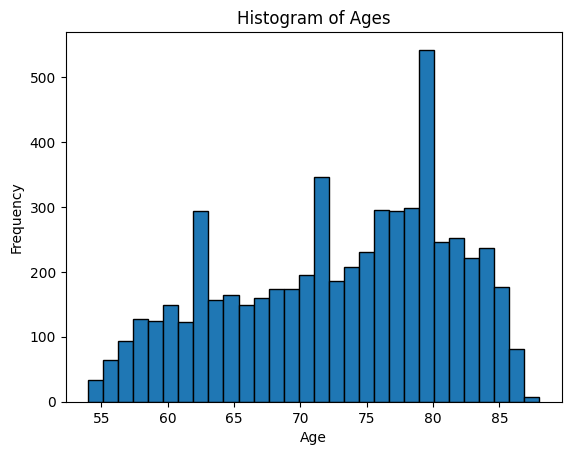

In [155]:
import matplotlib.pyplot as plt

plt.hist(Odata_train_with_age.obs['Age'], bins=30, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')
plt.show()

In [156]:
def ageCluster(adata):
    Odata = adata.copy()

    # 定义年龄分段
    bins = [50, 60, 70, 80, 90]
    labels = ['50-60', '60-70', '70-80', '80-90']
    
    # 使用 cut 方法进行分类
    Odata.obs['Age_Group'] = pd.cut(Odata.obs['Age'], bins=bins, labels=labels, right=False)

    print(Odata.obs)

    age_group_counts = Odata.obs['Age_Group'].value_counts().sort_index()
    print(age_group_counts)

    return Odata

In [158]:
Odata_train_with_age_cluster = ageCluster(Odata_train_with_age)
Odata_test_with_age_cluster = ageCluster(Odata_test_with_age)

         sex  DoB_Year  Age Age_Group
Id                                   
4345870    0    1954.0   70     70-80
4470636    1    1962.0   62     60-70
3236504    0    1946.0   78     70-80
3306041    1    1943.0   81     80-90
3306375    0    1944.0   80     80-90
...      ...       ...  ...       ...
5224082    0    1945.0   79     70-80
1887434    0    1958.0   66     60-70
3205452    1    1946.0   78     70-80
5933100    0    1951.0   73     70-80
4672729    0    1957.0   67     60-70

[5803 rows x 4 columns]
Age_Group
50-60     445
60-70    1542
70-80    2299
80-90    1517
Name: count, dtype: int64
         sex  DoB_Year  Age Age_Group
Id                                   
4228635    0    1951.0   73     70-80
1763478    1    1949.0   75     70-80
1611073    0    1953.0   71     70-80
1057039    0    1957.0   67     60-70
2018635    1    1967.0   57     50-60
...      ...       ...  ...       ...
1275089    1    1940.0   84     80-90
1436569    0    1948.0   76     70-80
4986938  

### Fake data

In [252]:
Odata.obs['sex'] = 0  # 初始化列
Odata.obs.iloc[:299, Odata.obs.columns.get_loc('sex')] = 1
Odata.obs.iloc[300:599, Odata.obs.columns.get_loc('sex')] = 2
Odata.obs.iloc[600:899, Odata.obs.columns.get_loc('sex')] = 3
Odata.obs.iloc[900:1000,Odata.obs.columns.get_loc('sex')] = 4

In [253]:
Odata.obs

,sex
Id,
1000221,1
1000326,1
1000662,1
1000823,1
1000945,1
...,...
1124392,4
1124453,4
1124594,4


In [254]:
Odata.obs.dtypes

sex    int64
dtype: object

In [255]:
Odata.X

array([[0.75756712, 1.05973776, 0.81593332, ..., 1.15026781, 1.23428036,
        1.03345226],
       [1.06221344, 2.29367793, 1.00201061, ..., 0.98589464, 0.73487288,
        1.03345226],
       [1.04225113, 1.41731008, 0.94009768, ..., 0.96449787, 0.96967555,
        1.18637255],
       ...,
       [0.62558883, 0.64716592, 1.13106043, ..., 0.97374337, 0.98147054,
        0.87453021],
       [1.26973817, 0.71192432, 0.98715767, ..., 1.04807525, 0.7798086 ,
        0.8538017 ],
       [1.35965287, 1.85586897, 0.97423427, ..., 1.08232248, 1.23428036,
        1.03345226]])

### Save data

In [159]:
Odata_train_with_age_cluster.write("./data/3-OLINK_data_sub_train.h5ad")
Odata_test_with_age_cluster.write("./data/3-OLINK_data_sub_test.h5ad")